In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle(r'assets/models/joey_cnn_intraday/history_100epochs_2classes.pkl')

In [2]:
df

{'loss': [3.2875282764434814,
  0.5117197036743164,
  0.4977438747882843,
  0.45082318782806396,
  0.4420986771583557,
  0.4377845227718353,
  0.43135932087898254,
  0.4138038754463196,
  0.4096740782260895,
  0.4000357389450073,
  0.4066690504550934,
  0.395231693983078,
  0.3961821496486664,
  0.3812997043132782,
  0.38437098264694214,
  0.3672105073928833,
  0.3727593421936035,
  0.37688586115837097,
  0.37306803464889526,
  0.36812153458595276,
  0.3632654845714569,
  0.3651966452598572,
  0.37246406078338623,
  0.3645685911178589,
  0.3659784197807312,
  0.3559442162513733,
  0.36182674765586853,
  0.3559531271457672,
  0.3623865246772766,
  0.3523715138435364,
  0.35060468316078186,
  0.3493083715438843,
  0.3485933542251587,
  0.3622016906738281,
  0.34274423122406006,
  0.34510838985443115,
  0.3444952368736267,
  0.33037951588630676,
  0.3295113742351532,
  0.34179818630218506,
  0.33406949043273926,
  0.33718782663345337,
  0.32352301478385925,
  0.3250207006931305,
  0.32789

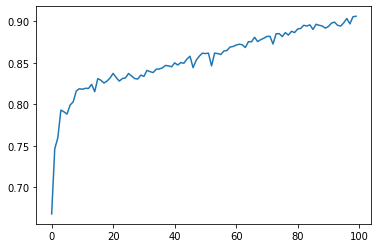

In [3]:
plt.plot(df['binary_accuracy'])

In [24]:
df = pd.read_csv('assets/short_term_symbols/AMD.csv').drop(columns=['Unnamed: 0'])
df = df.reindex(index=df.index[::-1])
df['time'] = pd.to_datetime(df['time'])
df = df.set_index(df['time']).drop(columns=['time'])
df = df.resample('5min').first()
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', 'close']].ffill()
df['volume'] = df['volume'].fillna(0)

df2 = pd.read_csv('assets/short_term_symbols/NVDA.csv').drop(columns=['Unnamed: 0'])
df2 = df2.reindex(index=df2.index[::-1])
df2['time'] = pd.to_datetime(df2['time'])
df2 = df2.set_index(df2['time']).drop(columns=['time'])
df2 = df2.resample('5min').first()
df2[['open', 'high', 'low', 'close']] = df2[['open', 'high', 'low', 'close']].ffill()
df2['volume'] = df2['volume'].fillna(0)

pd.concat([df.add_prefix('AMD_'), df2.add_prefix('NVDA_')], axis=1, join='outer')

,AMD_open,AMD_high,AMD_low,AMD_close,AMD_volume,NVDA_open,NVDA_high,NVDA_low,NVDA_close,NVDA_volume
time,,,,,,,,,,
2019-08-06 04:05:00,27.85,28.31,27.85,28.08,20594.0,37.476601,37.618539,37.476601,37.618539,2876.0
2019-08-06 04:10:00,28.11,28.11,28.02,28.09,2867.0,37.476601,37.618539,37.476601,37.618539,0.0
2019-08-06 04:15:00,28.10,28.20,28.06,28.20,6957.0,37.476601,37.618539,37.476601,37.618539,0.0
2019-08-06 04:20:00,28.20,28.20,28.20,28.20,4722.0,37.476601,37.618539,37.476601,37.618539,0.0
2019-08-06 04:25:00,28.21,28.28,28.21,28.26,4956.0,37.476601,37.618539,37.476601,37.618539,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-23 19:40:00,92.10,92.10,92.08,92.09,4648.0,194.855000,194.855000,194.760000,194.760000,1377.0
2021-07-23 19:45:00,92.08,92.11,92.08,92.11,949.0,194.730000,194.790000,194.730000,194.790000,757.0
2021-07-23 19:50:00,92.08,92.11,92.08,92.11,0.0,194.760000,194.950000,194.760000,194.950000,1467.0


In [19]:
results = pd.read_csv('assets/short_term_symbols/total.csv')
results['time'] = pd.to_datetime(results['time'])
results = results.set_index(results['time']).drop(columns=['time'])
results = results.loc['2020-07-20 04:05:00':]
results.head()

,NVDA_open,NVDA_high,NVDA_low,NVDA_close,NVDA_volume,AMD_open,AMD_high,AMD_low,AMD_close,AMD_volume,...,SPY_open,SPY_high,SPY_low,SPY_close,SPY_volume,QQQ_open,QQQ_high,QQQ_low,QQQ_close,QQQ_volume
time,,,,,,,,,,,,,,,,,,,,,
2021-07-20 19:40:00,759.89,760.12,759.85,760.0,0.0,87.2,87.28,87.2,87.23,0.0,...,425.81,425.84,425.7,425.75,0.0,355.64,355.64,355.54,355.59,0.0
2021-07-20 19:45:00,759.89,760.12,759.85,760.0,0.0,87.2,87.28,87.2,87.23,0.0,...,425.81,425.84,425.7,425.75,0.0,355.64,355.64,355.54,355.59,0.0
2021-07-20 19:50:00,759.89,760.12,759.85,760.0,0.0,87.2,87.28,87.2,87.23,0.0,...,425.81,425.84,425.7,425.75,0.0,355.64,355.64,355.54,355.59,0.0
2021-07-20 19:55:00,759.89,760.12,759.85,760.0,0.0,87.2,87.28,87.2,87.23,0.0,...,425.81,425.84,425.7,425.75,0.0,355.64,355.64,355.54,355.59,0.0
2021-07-20 20:00:00,759.89,760.12,759.85,760.0,0.0,87.2,87.28,87.2,87.23,0.0,...,425.81,425.84,425.7,425.75,0.0,355.64,355.64,355.54,355.59,0.0


In [20]:
for time in range(0, results.shape[0]):
    print(results.iloc[time].name.minute == 1 and 1 == 2)
    break

False
